https://www.marktechpost.com/2025/03/06/a-coding-guide-to-sentiment-analysis-of-customer-reviews-using-ibms-open-source-ai-model-granite-3b-and-hugging-face-transformers/?utm_source=flipboard&utm_content=topic/technology3https://www.marktechpost.com/2025/03/06/a-coding-guide-to-sentiment-analysis-of-customer-reviews-using-ibms-open-source-ai-model-granite-3b-and-hugging-face-transformers/?utm_source=flipboard&utm_content=topic/technology!pip install transformers torch accelerate

In [1]:
!pip install transformers torch accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 10.3 MB/s eta 0:00:00


In [2]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# device = "auto"
device = "cpu"
model_path = "ibm-granite/granite-3.0-3b-a800m-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_path)
# drop device_map if running on CPU
model = AutoModelForCausalLM.from_pretrained(model_path)
#model = AutoModelForCausalLM.from_pretrained(model_path, device_map=device)
model.eval()
# change input text as desired
chat = [
    { "role": "user", "content": "Please list one IBM Research laboratory located in the United States. You should only output its name and location." },
]
chat = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
# tokenize the text
input_tokens = tokenizer(chat, return_tensors="pt").to(device)
# generate output tokens
output = model.generate(**input_tokens, 
                        max_new_tokens=100)
# decode output tokens into text
output = tokenizer.batch_decode(output)
# print output
print(output)


OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like ibm-granite/granite-3.0-3b-a800m-instruct is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

In [2]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
model_id = "ibm-granite/granite-3.0-3b-a800m-instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map='auto',
    torch_dtype=torch.bfloat16,
    trust_remote_code=True
)

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/5.64k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/974k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/442k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/890 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.75G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the disk.
Device set to use mps


The provided code snippet is part of a Jupyter Notebook file named IBM_Granite_Sentiment_Analysis_Pipeline_Marktechpost.ipynb. It demonstrates how to set up a text generation pipeline using the Hugging Face Transformers library. The code begins by specifying the model ID for the IBM Granite model, which is `"ibm-granite/granite-3.0-3b-a800m-instruct"`. This model ID is used to load both the tokenizer and the model itself.

The tokenizer is instantiated using the `AutoTokenizer.from_pretrained` method, which loads a pre-trained tokenizer based on the specified model ID. The model is then loaded using the `AutoModelForCausalLM.from_pretrained` method. This method also takes several parameters: `device_map='auto'` to automatically map the model to available devices, `torch_dtype=torch.bfloat16` to specify the data type for the model's tensors, and `trust_remote_code=True` to allow the execution of custom code defined in the model repository.

After loading the tokenizer and model, the code sets up a text generation pipeline using the `pipeline` function from the Transformers library. The `pipeline` function is configured for the "text-generation" task and is provided with the previously loaded model and tokenizer. This pipeline can then be used to generate text based on input prompts.

The relevant function implementations provided offer a deeper understanding of how the `from_pretrained` methods for both the tokenizer and the model work. These methods handle various parameters and configurations, such as caching, downloading, and loading model configurations. The `pipeline` function is a utility that simplifies the creation of different types of pipelines, such as text generation, sentiment analysis, and question answering. It takes several optional parameters, including the model, tokenizer, feature extractor, and device settings, to customize the pipeline's behavior.

Overall, this code snippet demonstrates the process of setting up a text generation pipeline using a pre-trained model from the Hugging Face model hub. It highlights the flexibility and ease of use provided by the Transformers library for working with state-of-the-art natural language processing models.

In [4]:
def classify_sentiment(review):
    prompt = f"""Classify the sentiment of the following review as Positive, Negative, or Neutral.

Review: "{review}"

Sentiment:"""

    response = generator(
        prompt,
        max_new_tokens=5,
        do_sample=False,
        pad_token_id=tokenizer.eos_token_id
    )

    sentiment = response[0]['generated_text'].split("Sentiment:")[-1].split("\n")[0].strip()
    return sentiment

In [5]:
import pandas as pd

reviews = [
    "I absolutely loved the service! Definitely coming back.",
    "The item arrived damaged, very disappointed.",
    "Average product. Nothing too exciting.",
    "Superb experience, exceeded all expectations!",
    "Not worth the money, poor quality."
]

reviews_df = pd.DataFrame(reviews, columns=['review'])

In [6]:
reviews_df['sentiment'] = reviews_df['review'].apply(classify_sentiment)
print(reviews_df)

                                              review  sentiment
0  I absolutely loved the service! Definitely com...  Positive.
1       The item arrived damaged, very disappointed.  Negative.
2             Average product. Nothing too exciting.   Neutral.
3      Superb experience, exceeded all expectations!  Positive.
4                 Not worth the money, poor quality.  Negative.


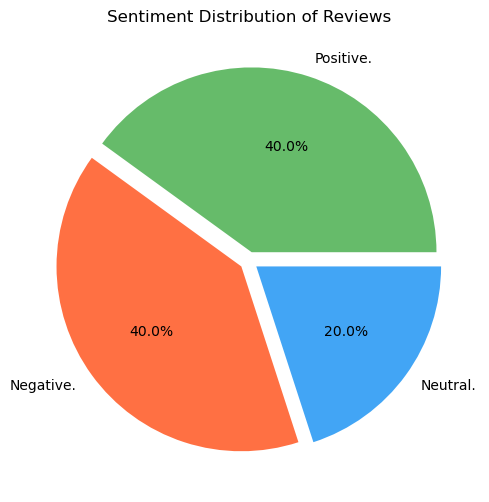

In [7]:
import matplotlib.pyplot as plt

sentiment_counts = reviews_df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot.pie(autopct='%1.1f%%', explode=[0.05]*len(sentiment_counts), colors=['#66bb6a', '#ff7043', '#42a5f5'])
plt.ylabel('')
plt.title('Sentiment Distribution of Reviews')
plt.show()